Use Case 9
==========

Problem Definition:
-------------------

A climate scientist wishes to analyse potential correlations between *Ozone* and *Cloud* ECVs.

Required Toolbox Features:
--------------------------

* Access to and ingestion of ESA CCI Ozone and Cloud data (Atmosphere Mole Content of Ozone and Cloud Cover)
* Geometric adjustments (coregistration)
* Spatial (point, polygon) and temporal subsetting
* Visualisation of time series
* Correlation analysis, scatter-plot of correlation statistics, saving of image and correlation statistics on disk (format options)

Ingest data and create datasets
-------------------------------

In [1]:
from cate.core.ds import DATA_STORE_REGISTRY
import cate.ops as ops
from cate.util import ConsoleMonitor

In [2]:
import xarray as xr

print(xr.__version__)

0.9.5


In [3]:
monitor = ConsoleMonitor()

In [4]:
data_store = DATA_STORE_REGISTRY.get_data_store('esa_cci_odp')
local_store = DATA_STORE_REGISTRY.get_data_store('local')

In [5]:
oz_remote_sources = data_store.query('ozone')
oz_remote_sources

[esacci.OZONE.mon.L3.NP.multi-sensor.multi-platform.MERGED.fv0002.r1,
 esacci.OZONE.day.L3S.TC.SCIAMACHY.Envisat.MERGED.fv0100.r1,
 esacci.OZONE.day.L3S.TC.GOME-2.Metop-A.MERGED.fv0100.r1,
 esacci.OZONE.day.L3S.TC.GOME.ERS-2.MERGED.fv0100.r1,
 esacci.OZONE.day.L3S.TC.multi-sensor.multi-platform.MERGED.fv0100.r1]

In [6]:
oz_remote_sources[0].make_local(local_name='ozone.mon',
                                time_range='2007-01-01, 2008-05-01',
                                monitor=monitor)

ValueError: Local data store 'local' already contains a data source named 'local.ozone.mon'

In [7]:
oz_local_ds = local_store.query('local.ozone.mon')[0]

In [8]:
cl_remote_sources = data_store.query('cloud')
cl_remote_sources

[esacci.CLOUD.day.L3U.CLD_PRODUCTS.AVHRR.NOAA-15.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.AVHRR.NOAA-17.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.AVHRR.NOAA-18.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.AVHRR.NOAA-16.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.mon.L3S.CLD_PRODUCTS.MODIS.multi-platform.MODIS_MERGED.1-0.r1,
 esacci.CLOUD.mon.L3S.CLD_PRODUCTS.AVHRR.multi-platform.AVHRR_MERGED.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.MODIS.Terra.MODIS_TERRA.1-0.r1,
 esacci.CLOUD.day.L3U.CLD_PRODUCTS.MODIS.Aqua.MODIS_AQUA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-18.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-16.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-15.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-17.AVHRR_NOAA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.MODIS.Terra.MODIS_TERRA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.MODIS.Aqua.MODIS_AQUA.1-0.r1,
 esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVH

In [9]:
cl_remote_sources[11].make_local(local_name='clouds.mon',
                                time_range='2007-01-01, 2008-05-01',
                                monitor=monitor)

ValueError: Local data store 'local' already contains a data source named 'local.clouds.mon'

In [10]:
cl_local_ds = local_store.query('local.clouds.mon')[0]

In [11]:
cc = cl_local_ds.open_dataset()
cc = ops.harmonize(cc)

In [12]:
oz = oz_local_ds.open_dataset()

Filter datasets to select the desired variables
-----------------------------------------------

In [13]:
cc_tot = ops.select_var(cc, 'cc_total')
oz_tot = ops.select_var(oz, 'O3_du_tot')

In [14]:
oz_tot

<xarray.Dataset>
Dimensions:       (air_pressure: 17, lat: 180, layers: 16, lon: 360, time: 3)
Coordinates:
  * lon           (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 ...
  * lat           (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
  * layers        (layers) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * air_pressure  (air_pressure) float32 1013.0 446.05 196.35 113.63 65.75 ...
  * time          (time) datetime64[ns] 2007-01-04 2007-02-01 2007-03-01
Data variables:
    O3_du_tot     (time, lat, lon) float32 260.176 264.998 267.394 265.048 ...
Attributes:
    title:                      ESA CCI ozone level 3 monthly.
    institution:                Royal Netherlands Meteorological Institute, KNMI
    source:                     This dataset contains L2 profiles from GOME, ...
    history:                    L2 data gridded to global grid.
    references:                 http://www.esa-ozone-cci.org/
    tracking_id:                11E663A9-534B-4A72-845

Plot the first time slice of the dataset

[-180.0, 180.0, -90.0, 90.0]


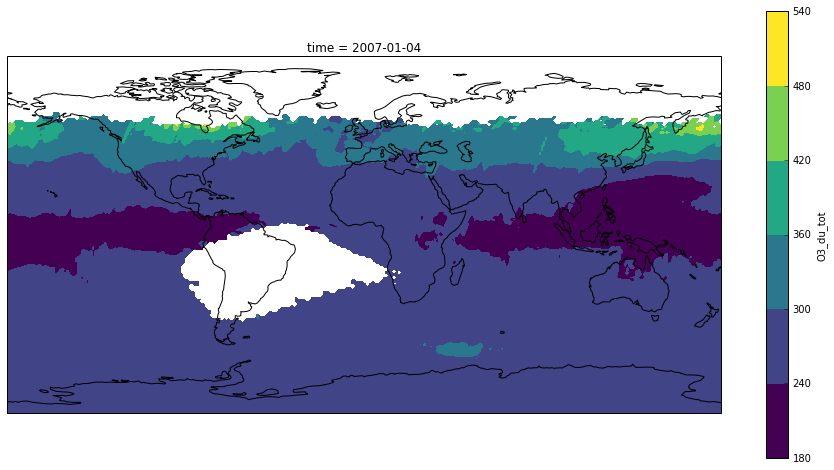

In [15]:
%matplotlib inline
ops.plot_map(oz_tot, var='O3_du_tot', time=0, file='/home/ccitbx/Desktop/fig1.png')

[-180.0, 180.0, -90.0, 90.0]


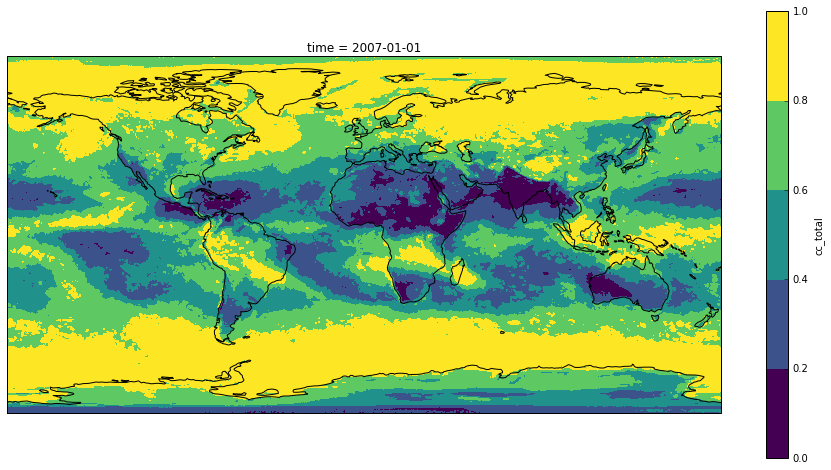

In [16]:
ops.plot_map(cc_tot, var='cc_total', time=0, file='/home/ccitbx/Desktop/fig2.png')

Co-register datasets by resampling
----------------------------------

In [17]:
print(cc_tot['cc_total'].shape)
print(oz_tot['O3_du_tot'].shape)

(3, 360, 720)
(3, 180, 360)


In [18]:
cc_tot_res = ops.coregister(oz_tot, cc_tot)

In [19]:
print(cc_tot_res['cc_total'].shape)
print(oz_tot['O3_du_tot'].shape)

(3, 180, 360)
(3, 180, 360)


[-180.0, 180.0, -90.0, 90.0]


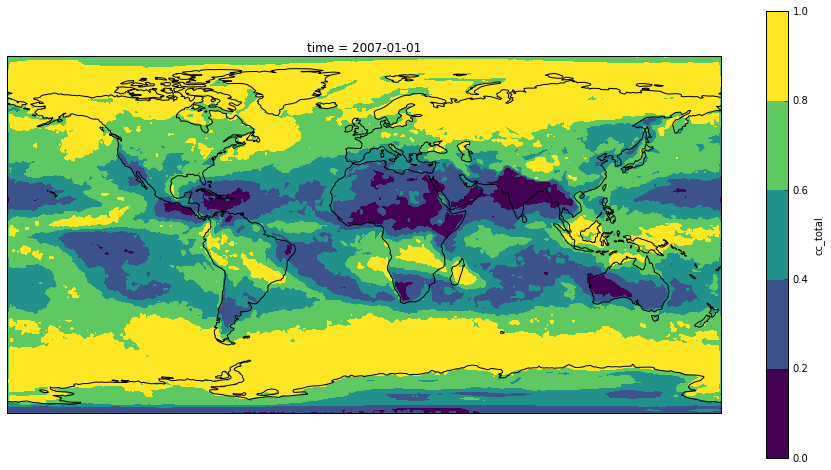

In [20]:
ops.plot_map(cc_tot_res, var='cc_total', time=0, file='/home/ccitbx/Desktop/fig3.png')

Select the desired spatial region
---------------------------------

In [21]:
africa = '-20.0, -40.0, 60.0, 40.0'
# 'lon_min, lat_min, lon_max, lat_max'
cc_tot_africa = ops.subset_spatial(cc_tot_res, africa)
oz_tot_africa = ops.subset_spatial(oz_tot, africa)

[-180.0, 180.0, -90.0, 90.0]


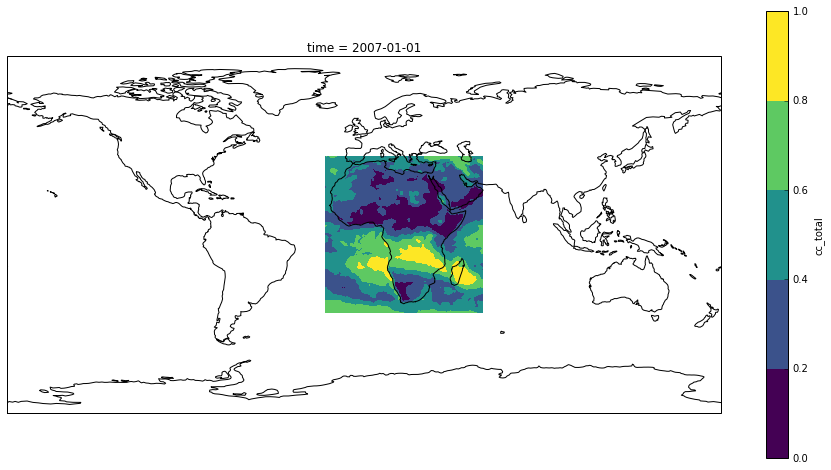

In [22]:
ops.plot_map(cc_tot_africa, var='cc_total', time=0, file='/home/ccitbx/Desktop/fig4.png')

(-20.0, -40.0, 60.0, 40.0)
[-20.0, 60.0, -40.0, 40.0]


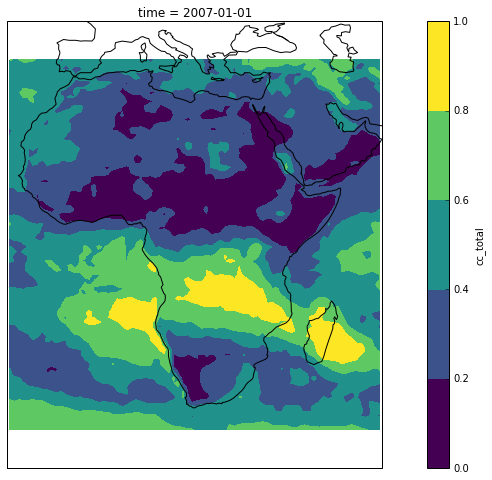

In [23]:
ops.plot_map(cc_tot_africa, var='cc_total', time=0, 
                 region=africa, file='/home/ccitbx/Desktop/fig5.png')

Select the desired temporal region
----------------------------------

In [25]:
cc_tot_janoct = ops.subset_temporal(cc_tot_africa, '2007-01-01, 2007-10-30')
oz_tot_janoct = ops.subset_temporal(oz_tot_africa, '2007-01-01, 2007-10-30')

In [26]:
print(cc_tot_janoct.time)

<xarray.DataArray 'time' (time: 3)>
array(['2007-01-01T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01 2007-02-01 2007-03-01
Attributes:
    long_name:      time
    calendar:       standard
    units:          day
    standard_name:  time


In [27]:
print(oz_tot_janoct.time)

<xarray.DataArray 'time' (time: 3)>
array(['2007-01-04T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2007-01-04 2007-02-01 2007-03-01
Attributes:
    standard_name:  time
    long_name:      time


Retrieve and plot timeseries
----------------------------

In [28]:
oz_ts_point = ops.tseries_point(oz_tot_janoct, point='50, 50')
cc_ts_point = ops.tseries_point(cc_tot_janoct, point='50, 50')
oz_ts_mean = ops.tseries_mean(oz_tot_janoct, var='O3_du_tot')
cc_ts_mean = ops.tseries_mean(cc_tot_janoct, var='cc_total')

In [29]:
print(oz_ts_mean)

<xarray.Dataset>
Dimensions:        (air_pressure: 17, lat: 80, layers: 16, lon: 80, time: 3)
Coordinates:
  * lon            (lon) float32 -19.5 -18.5 -17.5 -16.5 -15.5 -14.5 -13.5 ...
  * lat            (lat) float32 -39.5 -38.5 -37.5 -36.5 -35.5 -34.5 -33.5 ...
  * layers         (layers) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * air_pressure   (air_pressure) float32 1013.0 446.05 196.35 113.63 65.75 ...
  * time           (time) datetime64[ns] 2007-01-04 2007-02-01 2007-03-01
Data variables:
    O3_du_tot      (time) float32 258.006 261.682 268.869
    O3_du_tot_std  (time) float32 18.9245 24.2296 29.3142
Attributes:
    title:                      ESA CCI ozone level 3 monthly.
    institution:                Royal Netherlands Meteorological Institute, KNMI
    source:                     This dataset contains L2 profiles from GOME, ...
    history:                    L2 data gridded to global grid.
    references:                 http://www.esa-ozone-cci.org/
    tracking_

In [30]:
print(cc_ts_mean)

<xarray.Dataset>
Dimensions:       (lat: 80, lon: 80, time: 3)
Coordinates:
  * lat           (lat) float32 -39.5 -38.5 -37.5 -36.5 -35.5 -34.5 -33.5 ...
  * time          (time) datetime64[ns] 2007-01-01 2007-02-01 2007-03-01
  * lon           (lon) float32 -19.5 -18.5 -17.5 -16.5 -15.5 -14.5 -13.5 ...
Data variables:
    cc_total      (time) float64 0.4251 0.4212 0.3855
    cc_total_std  (time) float64 0.205 0.2103 0.1898


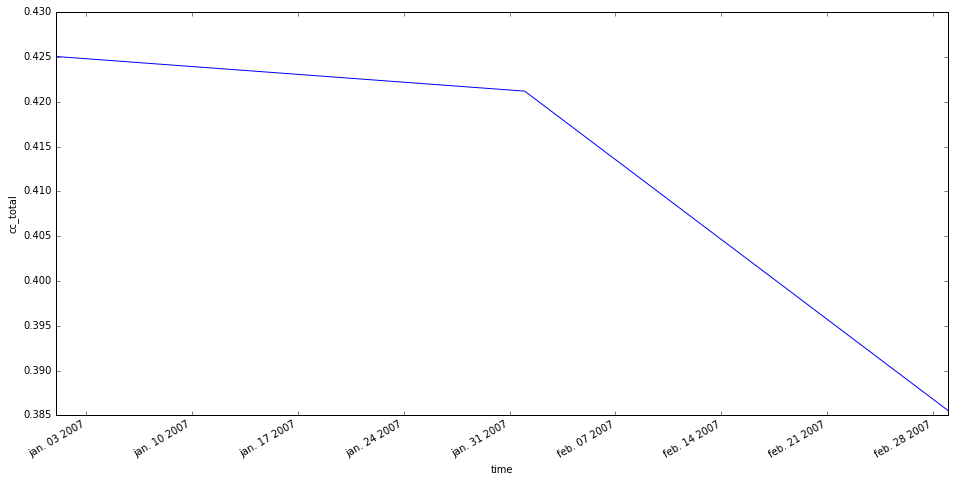

In [31]:
ops.plot(cc_ts_mean, 'cc_total', file='/home/ccitbx/Desktop/fig6.png')

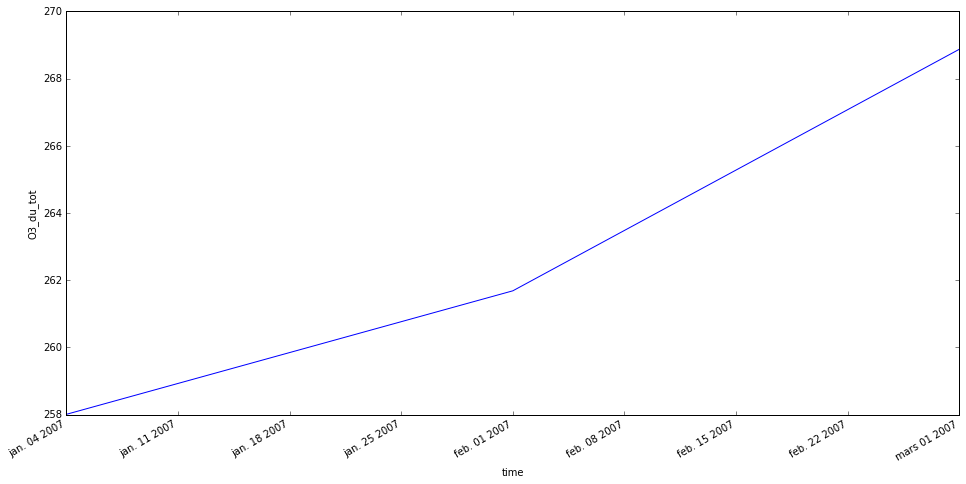

In [32]:
ops.plot(oz_ts_mean, 'O3_du_tot', file='/home/ccitbx/Desktop/fig7.png')

Do correlation analysis
-----------------------

In [33]:
correlation = ops.pearson_correlation(cc_ts_mean, oz_ts_mean, 'cc_total', 'O3_du_tot',
                                          file="/home/ccitbx/Desktop/correlation.txt")
correlation

<xarray.Dataset>
Dimensions:    ()
Data variables:
    corr_coef  float64 -0.9689
    p_value    float64 0.1593
Attributes:
    Cate_Description:  Correlation between O3_du_tot cc_total

In [34]:
correlation = ops.pearson_correlation(cc_tot_janoct, oz_tot_janoct, 'cc_total', 'O3_du_tot')

In [35]:
correlation

<xarray.Dataset>
Dimensions:    (lat: 80, lon: 80)
Coordinates:
  * lon        (lon) float32 -19.5 -18.5 -17.5 -16.5 -15.5 -14.5 -13.5 -12.5 ...
  * lat        (lat) float32 -39.5 -38.5 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 ...
Data variables:
    corr_coef  (lat, lon) float64 -0.8176 -0.7344 -0.917 -0.9399 -0.9592 ...
    p_value    (lat, lon) float64 0.3906 0.4749 0.2611 0.2218 0.1825 0.04477 ...
Attributes:
    Cate_Description:  Correlation between O3_du_tot cc_total

(-20.0, -40.0, 60.0, 40.0)
[-20.0, 60.0, -40.0, 40.0]


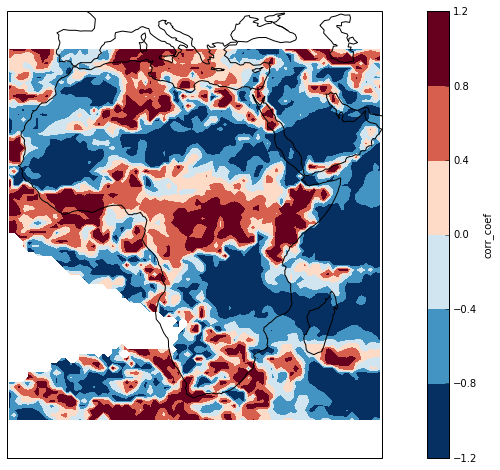

In [36]:
ops.plot_map(correlation, var='corr_coef', 
             region=africa, file='/home/ccitbx/Desktop/fig8.png')